In [77]:
# import those goodies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import re
import math

pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", None)

In [55]:
# import datasets
daycare_raw = pd.read_csv('/Users/trevorban/Desktop/zri-data/HHSC_CCL_Daycare_and_Residential_Operations_Data.csv')
bev_raw = pd.read_csv('/Users/trevorban/Desktop/zri-data/Mixed_Beverage_Gross_Receipts.csv')
env_raw = pd.read_csv('/Users/trevorban/Desktop/zri-data/Texas_Commission_on_Environmental_Quality_-_Notices_Of_Violation__NOV_.csv')

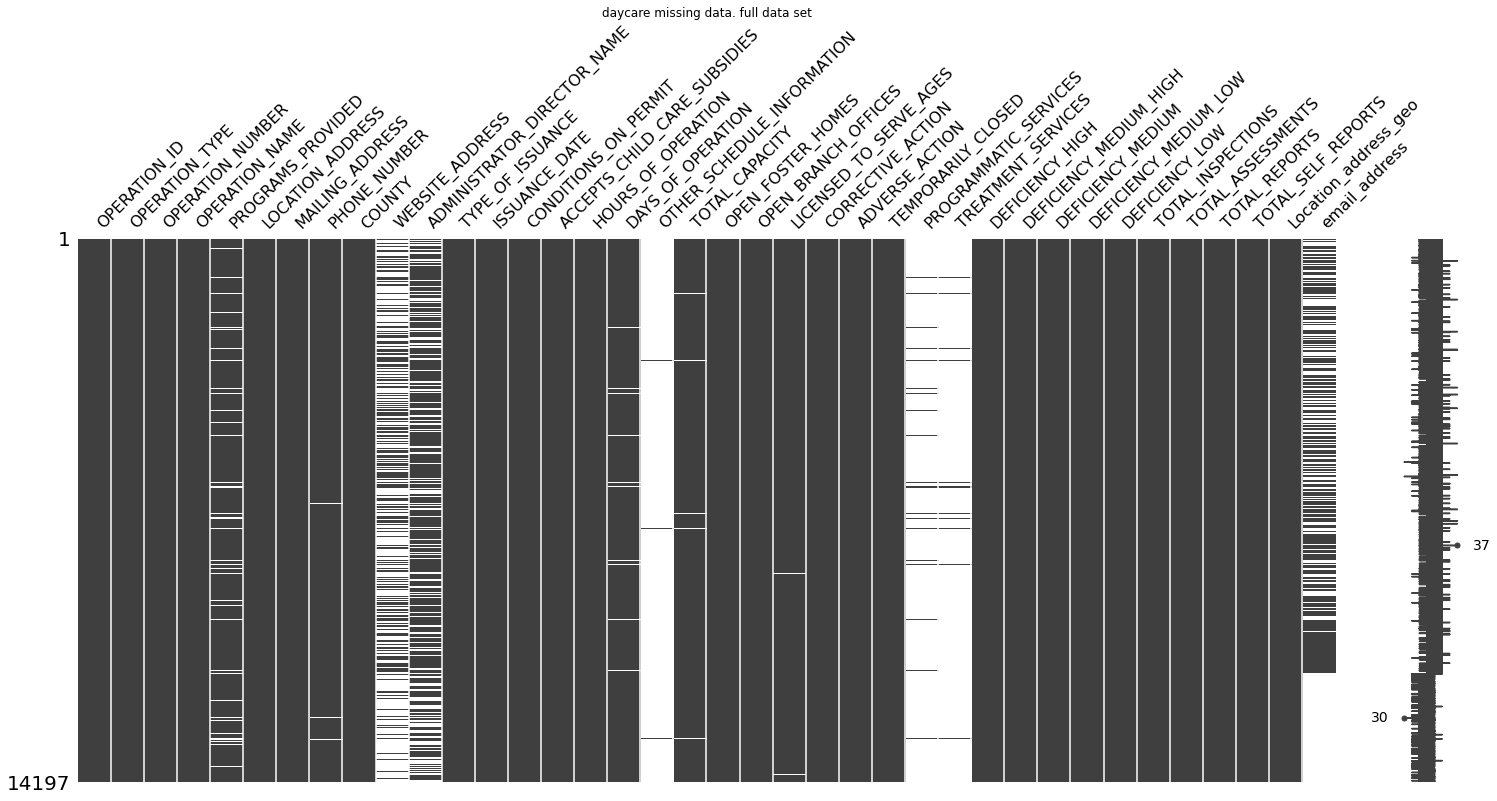

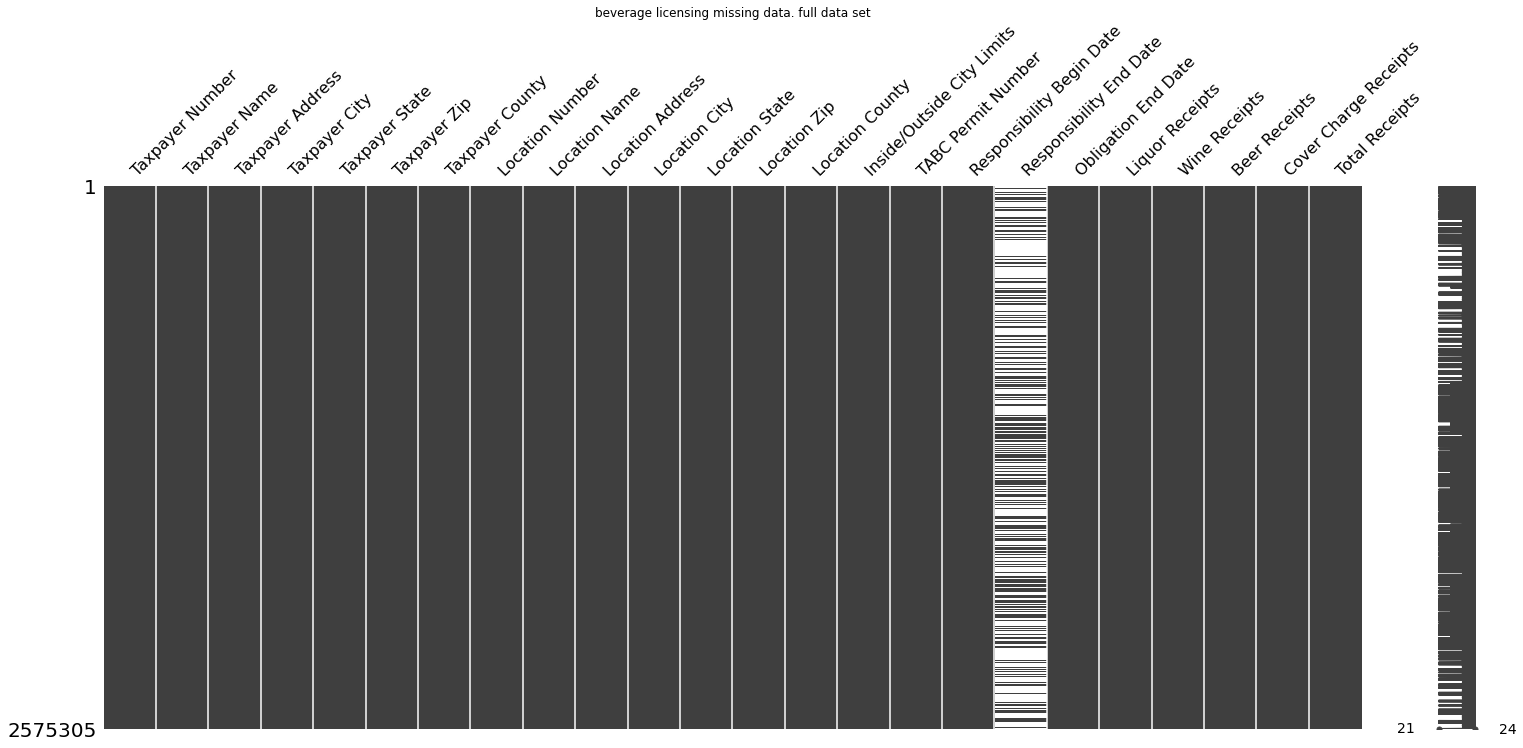

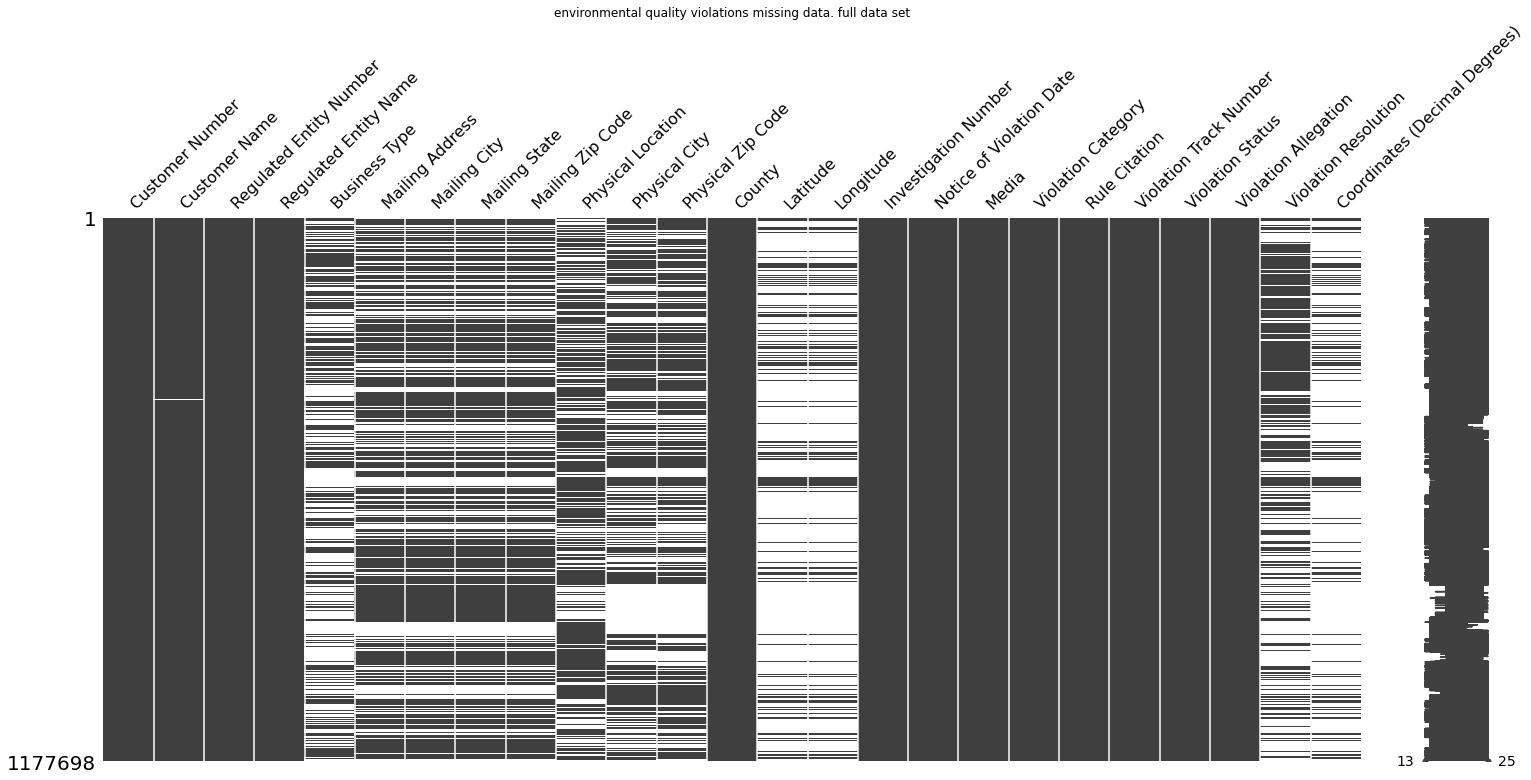

In [56]:
# check for nulls in each, check shape and datatype

msno.matrix(daycare_raw)
plt.title('daycare missing data. full data set')
plt.show()

msno.matrix(bev_raw)
plt.title('beverage licensing missing data. full data set')
plt.show()

msno.matrix(env_raw)
plt.title('environmental quality violations missing data. full data set')
plt.show()

In [57]:
print('daycare shape is ' + str(daycare_raw.shape))
print('bev shape is ' + str(bev_raw.shape))
print('env shape is ' + str(env_raw.shape))

daycare shape is (14197, 38)
bev shape is (2575305, 24)
env shape is (1177698, 25)


In [58]:
print('===============DAYCARE================')
print(daycare_raw.dtypes)
print('===============ENV================')
print(env_raw.dtypes)
print('===============BEV================')
print(bev_raw.dtypes)

===============DAYCARE================
OPERATION_ID             int64
OPERATION_TYPE          object
OPERATION_NUMBER        object
OPERATION_NAME          object
PROGRAMS_PROVIDED       object
                         ...  
TOTAL_ASSESSMENTS        int64
TOTAL_REPORTS            int64
TOTAL_SELF_REPORTS       int64
Location_address_geo    object
email_address           object
Length: 38, dtype: object
===============ENV================
Customer Number                  object
Customer Name                    object
Regulated Entity Number          object
Regulated Entity Name            object
Business Type                    object
                                  ...  
Violation Track Number            int64
Violation Status                 object
Violation Allegation             object
Violation Resolution             object
Coordinates (Decimal Degrees)    object
Length: 25, dtype: object
===============BEV================
Taxpayer Number           int64
Taxpayer Name            o

In [275]:
# Find zip codes for cities
dfw_zip = [75201, 75202, 75203, 75204, 75205, 75206, 75207, 75208, 75209, 75210, 75211, 75212, 75214, 75215, 75216, 75217, 75218, 75219, 75220, 75221, 75222, 75223, 75224, 75225, 75226, 75227, 75228, 75229, 75230, 75231, 75232, 75233, 75234, 75235, 75236, 75237, 75238, 75239, 75240, 75241, 75242, 75243, 75244, 75245, 75246, 75247, 75248, 75249, 75250, 75251, 75252, 75253, 75258, 75260, 75261, 75262, 75263, 75264, 75265, 75266, 75267, 75270, 75275, 75277, 75283, 75284, 75285, 75286, 75287, 75294, 75295, 75301, 75303, 75310, 75312, 75313, 75315, 75320, 75323, 75326, 75336, 75339, 75342, 75346, 75350, 75353, 75354, 75355, 75356, 75357, 75359, 75360, 75363, 75364, 75367, 75368, 75370, 75371, 75372, 75373, 75374, 75376, 75378, 75379, 75380, 75381, 75382, 75386, 75387, 75388, 75389, 75390, 75391, 75392, 75393, 75394, 75395, 75396, 75397, 75398]
# https://www.maxleaman.com/mortgage-resources/texas-zip-code-maps/dfw-zip-code-map/
sa_zip = [78023, 78056, 78073, 78109, 78112, 78154, 78201, 78202, 78203, 78204, 78205, 78207, 78208, 78209, 78210, 78211, 78212, 78213, 78214, 78215, 78216, 78217, 78218, 78219, 78220, 78221, 78222, 78223, 78224, 78225, 78226, 78227, 78228, 78229, 78230, 78231, 78232, 78233, 78234, 78235, 78236, 78237, 78238, 78239, 78240, 78242, 78243, 78244, 78245, 78247, 78248, 78249, 78250, 78251, 78252, 78253, 78254, 78255, 78256, 78257, 78258, 78259, 78260, 78263, 78264, 78266]
# https://www.city-data.com/zipmaps/San-Antonio-Texas.html
hstn_zip = [77002, 77003, 77004, 77005, 77006, 77007, 77008, 77009, 77010, 77011, 77012, 77013, 77014, 77015, 77016, 77017, 77018, 77019, 77020, 77021, 77022, 77023, 77024, 77025, 77026, 77027, 77028, 77029, 77030, 77031, 77032, 77033, 77034, 77035, 77036, 77037, 77038, 77039, 77040, 77041, 77042, 77043, 77044, 77045, 77046, 77047, 77048, 77049, 77050, 77051, 77053, 77054, 77055, 77056, 77057, 77058, 77059, 77060, 77061, 77062, 77063, 77064, 77065, 77066, 77067, 77068, 77069, 77070, 77071, 77072, 77073, 77074, 77075, 77076, 77077, 77078, 77079, 77080, 77081, 77082, 77083, 77084, 77085, 77086, 77087, 77088, 77089, 77090, 77091, 77092, 77093, 77094, 77095, 77096, 77098, 77099, 77201, 77336, 77338, 77339, 77345, 77346, 77357, 77365, 77373, 77375, 77377, 77379, 77386, 77388, 77396, 77401, 77406, 77407, 77429, 77433, 77447, 77449, 77450, 77477, 77478, 77484, 77489, 77493, 77494, 77498, 77503, 77504, 77506, 77520, 77530, 77532, 77536, 77546, 77547, 77571, 77587, 77598]

astn_zip = [78610, 78613, 78617, 78641, 78652, 78653, 78660, 78664, 78681, 78701, 78702, 78703, 78704, 78705, 78712, 78717, 78719, 78721, 78722, 78723, 78724, 78725, 78726, 78727, 78728, 78729, 78730, 78731, 78732, 78733, 78734, 78735, 78736, 78737, 78738, 78739, 78741, 78742, 78744, 78745, 78746, 78747, 78748, 78749, 78750, 78751, 78752, 78753, 78754, 78756, 78757, 78758, 78759]


### begin reducing datasets

In [276]:
bev_raw.head(5)

,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Location Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Inside/Outside City Limits,TABC Permit Number,Responsibility Begin Date,Responsibility End Date,Obligation End Date,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
0,32047970895,HONDURAS MAYA CAFE & BAR LLC,8011 HAZEN ST,HOUSTON,TX,77036.0,101,1,HONDURAS MAYA CAFE & BAR LLC,5945 BELLAIRE BLVD STE B,HOUSTON,TX,77081,101,Y,MB817033,08/16/2012,09/12/2019,07/31/2019,0,0,0,0,0
1,32049923835,"MERMAID KARAOKE PRIVATE CLUB, INC.",2639 WALNUT HILL LN STE 225,DALLAS,TX,75229.0,57,1,MERMAID KARAOKE PRIVATE CLUB,1310 W CAMPBELL RD STE 103,RICHARDSON,TX,75080,57,Y,N 837378,04/12/2013,07/01/2015,08/31/2014,480,185,1374,0,2039
2,32034036304,FENG KAI CORPORATION,8427 BOULEVARD 26,N RICHLND HLS,TX,76180.0,220,1,JAPANESE GRILL,8427 BOULEVARD 26,NORTH RICHLAND HILLS,TX,76180,220,Y,MB576670,05/01/2008,03/17/2018,06/30/2016,1143,167,669,0,1979
3,14537211071,"THE HUTTO SMITHS, LLC",429 LITTLE LAKE RD,HUTTO,TX,78634.0,246,1,THE DOWNTOWN HALL OF FAME,205 EAST ST,HUTTO,TX,78634,246,Y,MB791778,12/06/2011,NaN,03/31/2018,12881,357,10447,0,23685
4,32019999229,"THE CROSSING AT FIDDLE CREEK, INC.",1620 W CEDAR ST,STEPHENVILLE,TX,76401.0,72,1,THE CROSSING AT FIDDLE CREEK INC,2004 W SWAN ST,STEPHENVILLE,TX,76401,72,Y,N 643163,10/26/2006,11/30/2013,08/31/2008,4841,2413,4620,0,11874


In [277]:
bev = bev_raw.loc[:, ['Location City', 'Location Zip', 'Location County', 'Location State', 'Responsibility Begin Date', 'Obligation End Date', 'Total Receipts']]



In [278]:
bev.loc[:, 'log_receipts'] = bev['Total Receipts'].apply(lambda x: np.log(x+1))
bev.head()

,Location City,Location Zip,Location County,Location State,Responsibility Begin Date,Obligation End Date,Total Receipts,log_receipts
0,HOUSTON,77081,101,TX,08/16/2012,07/31/2019,0,0.000000
1,RICHARDSON,75080,57,TX,04/12/2013,08/31/2014,2039,7.620705
2,NORTH RICHLAND HILLS,76180,220,TX,05/01/2008,06/30/2016,1979,7.590852
3,HUTTO,78634,246,TX,12/06/2011,03/31/2018,23685,10.072639
4,STEPHENVILLE,76401,72,TX,10/26/2006,08/31/2008,11874,9.382191


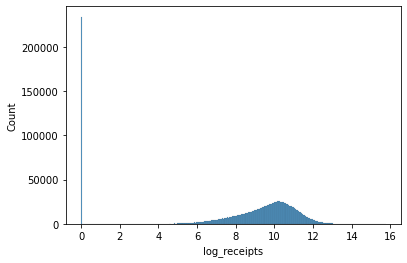

In [279]:
sns.histplot(bev, x='log_receipts');

In [280]:
bev['Responsibility Begin Date'] = pd.to_datetime(bev['Responsibility Begin Date'])
bev['Obligation End Date'] = pd.to_datetime(bev['Obligation End Date'])

In [290]:
abev = bev[bev['Location City'] == 'AUSTIN']
abev = abev[['Location Zip', 'Responsibility Begin Date', 'Obligation End Date', 'Total Receipts']]
abev = abev[abev['Responsibility Begin Date'] >= pd.to_datetime('2014/01/01')]
abev.sort_values(by='Location Zip')
#abev['timeframe'] = abev[pd.Timestamp(abev['Responsibility Begin Date']) : pd.Timestamp(abev['Obligation End Date'])]
abev                        

,Location Zip,Responsibility Begin Date,Obligation End Date,Total Receipts
57,78737,2018-11-09,2019-06-30,0
69,78745,2014-12-08,2015-11-30,8160
124,78757,2014-10-22,2016-08-31,6254
181,78745,2014-12-08,2016-04-30,8797
197,78705,2014-09-25,2017-02-28,4766
...,...,...,...,...
2575085,78719,2019-09-16,2021-08-31,75142
2575172,78701,2017-08-03,2019-07-31,115242
2575190,78752,2021-05-21,2021-06-30,0
2575205,78701,2015-03-09,2021-08-31,103620


In [282]:
abev.between_time()

TypeError: between_time() missing 2 required positional arguments: 'start_time' and 'end_time'

In [284]:
# has_bar = pd.DataFrame(index=dates).reset_index().T
# austin = abev.join(has_bar, how='outer').fillna(0)
# austin

In [205]:
has_bar.iloc[0]['month']

Timestamp('2012-01-01 00:00:00')

In [283]:
test = abev.head(50)

In [190]:
def time_in_range(start, end, x):
    """Return true if x is in the range [start, end]"""
    if start <= end:
        return start <= x <= end
    else:
        return start <= x or x <= end

In [173]:
for i, row in has_bar.iterrows():
    print(row)

month   2012-01-01
Name: 0, dtype: datetime64[ns]
month   2012-02-01
Name: 1, dtype: datetime64[ns]
month   2012-03-01
Name: 2, dtype: datetime64[ns]
month   2012-04-01
Name: 3, dtype: datetime64[ns]
month   2012-05-01
Name: 4, dtype: datetime64[ns]
month   2012-06-01
Name: 5, dtype: datetime64[ns]
month   2012-07-01
Name: 6, dtype: datetime64[ns]
month   2012-08-01
Name: 7, dtype: datetime64[ns]
month   2012-09-01
Name: 8, dtype: datetime64[ns]
month   2012-10-01
Name: 9, dtype: datetime64[ns]
month   2012-11-01
Name: 10, dtype: datetime64[ns]
month   2012-12-01
Name: 11, dtype: datetime64[ns]
month   2013-01-01
Name: 12, dtype: datetime64[ns]
month   2013-02-01
Name: 13, dtype: datetime64[ns]
month   2013-03-01
Name: 14, dtype: datetime64[ns]
month   2013-04-01
Name: 15, dtype: datetime64[ns]
month   2013-05-01
Name: 16, dtype: datetime64[ns]
month   2013-06-01
Name: 17, dtype: datetime64[ns]
month   2013-07-01
Name: 18, dtype: datetime64[ns]
month   2013-08-01
Name: 19, dtype: datet

In [171]:
for i, row in test.iterrows():
    print(row['Responsibility Begin Date'])
    print(row['Obligation End Date'])
    print('================================================')

2012-08-16 00:00:00
2019-07-31 00:00:00
2013-04-12 00:00:00
2014-08-31 00:00:00
2008-05-01 00:00:00
2016-06-30 00:00:00
2011-12-06 00:00:00
2018-03-31 00:00:00
2006-10-26 00:00:00
2008-08-31 00:00:00
2000-11-02 00:00:00
2015-01-31 00:00:00
1995-05-11 00:00:00
2008-04-30 00:00:00
2009-10-13 00:00:00
2010-08-31 00:00:00
2013-11-13 00:00:00
2014-01-31 00:00:00
2012-08-23 00:00:00
2015-10-31 00:00:00
2017-06-02 00:00:00
2017-07-31 00:00:00
1995-10-31 00:00:00
2008-08-31 00:00:00
2015-11-05 00:00:00
2017-05-31 00:00:00
2010-03-01 00:00:00
2016-01-31 00:00:00
2011-03-14 00:00:00
2011-12-31 00:00:00
2007-02-06 00:00:00
2014-09-30 00:00:00
2013-11-13 00:00:00
2014-05-31 00:00:00
2013-08-30 00:00:00
2020-05-31 00:00:00
2010-03-01 00:00:00
2010-03-31 00:00:00
2012-11-26 00:00:00
2015-03-31 00:00:00
2011-09-01 00:00:00
2018-03-31 00:00:00
2015-10-05 00:00:00
2017-05-31 00:00:00
2006-10-26 00:00:00
2010-11-30 00:00:00
2007-04-04 00:00:00
2007-10-31 00:00:00
2011-02-28 00:00:00
2011-07-31 00:00:00


In [214]:
for i in range(len(dates)):
    for x, row in test.iterrows():
        if time_in_range(row['Responsibility Begin Date'], row['Obligation End Date'], has_bar.iloc[i]['month']):
            has_bar.iloc[i]['count'] += 1
print(has_bar)
        

/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


         month  count
0   2012-01-01    0.0
1   2012-02-01    0.0
2   2012-03-01    0.0
3   2012-04-01    0.0
4   2012-05-01    0.0
..         ...    ...
111 2021-04-01    0.0
112 2021-05-01    0.0
113 2021-06-01    0.0
114 2021-07-01    0.0
115 2021-08-01    0.0

[116 rows x 2 columns]


In [291]:
abev

,Location Zip,Responsibility Begin Date,Obligation End Date,Total Receipts
57,78737,2018-11-09,2019-06-30,0
69,78745,2014-12-08,2015-11-30,8160
124,78757,2014-10-22,2016-08-31,6254
181,78745,2014-12-08,2016-04-30,8797
197,78705,2014-09-25,2017-02-28,4766
...,...,...,...,...
2575085,78719,2019-09-16,2021-08-31,75142
2575172,78701,2017-08-03,2019-07-31,115242
2575190,78752,2021-05-21,2021-06-30,0
2575205,78701,2015-03-09,2021-08-31,103620


In [ ]:
abev['month'] = abev['']

In [60]:
daycare_raw.head()

,OPERATION_ID,OPERATION_TYPE,OPERATION_NUMBER,OPERATION_NAME,PROGRAMS_PROVIDED,LOCATION_ADDRESS,MAILING_ADDRESS,PHONE_NUMBER,COUNTY,WEBSITE_ADDRESS,ADMINISTRATOR_DIRECTOR_NAME,TYPE_OF_ISSUANCE,ISSUANCE_DATE,CONDITIONS_ON_PERMIT,ACCEPTS_CHILD_CARE_SUBSIDIES,HOURS_OF_OPERATION,DAYS_OF_OPERATION,OTHER_SCHEDULE_INFORMATION,TOTAL_CAPACITY,OPEN_FOSTER_HOMES,OPEN_BRANCH_OFFICES,LICENSED_TO_SERVE_AGES,CORRECTIVE_ACTION,ADVERSE_ACTION,TEMPORARILY_CLOSED,PROGRAMMATIC_SERVICES,TREATMENT_SERVICES,DEFICIENCY_HIGH,DEFICIENCY_MEDIUM_HIGH,DEFICIENCY_MEDIUM,DEFICIENCY_MEDIUM_LOW,DEFICIENCY_LOW,TOTAL_INSPECTIONS,TOTAL_ASSESSMENTS,TOTAL_REPORTS,TOTAL_SELF_REPORTS,Location_address_geo,email_address
0,1384777,Licensed Center,1725801,Bright Bee Montessori,"Snacks Provided,Skill Classes,Part Time Care",900 NELSON RANCH RD CEDAR PARK TX- 78613 4210,900 NELSON RANCH RD CEDAR PARK TX- 78613 4210,5.123487e+09,WILLIAMSON,www.brightbeemontessori.com,Shanmuga Vedamurthi,Initial,09/01/2021,NO,N,07:00 AM-06:30 PM,"Mon,Tue,Wed,Thu,Fri",NaN,129.0,0,0,"Infant,Toddler,Pre-Kindergarten,School",NO,NO,NO,NaN,NaN,0,0,0,0,0,1,0,0,0,900 NELSON RANCH RD CEDAR PARK TX- 78613 4210,NaN
1,299007,Licensed Center,862592,YMCA @ Winship Elementary,After School Care,2175 SPRING CREEK DR SPRING TX- 77373 6141,1331 AUGUSTA DR HOUSTON TX- 77057 2415,2.814691e+09,HARRIS,NaN,NaN,Full Permit,02/05/2007,YES,N,03:30 PM-06:30 PM,"Mon,Tue,Wed,Thu,Fri",NaN,51.0,0,0,School,NO,NO,NO,NaN,NaN,0,3,1,0,0,7,0,0,0,2175 SPRING CREEK DR SPRING TX- 77373 6141,NaN
2,1354778,Licensed Center,1707407,Destiny Learning Center,"Before School Care,Meals Provided ,After Schoo...",917 STRAUS RD CEDAR HILL TX- 75104 5317,917 STRAUS RD CEDAR HILL TX- 75104 5317,6.822418e+09,DALLAS,NaN,Destiny Walton,Full Permit,12/07/2020,NO,Y,06:00 AM-05:30 PM,"Mon,Tue,Wed,Thu,Fri",NaN,31.0,0,0,"Infant,Toddler,Pre-Kindergarten,School",NO,NO,NO,NaN,NaN,1,13,0,0,0,8,1,1,0,917 STRAUS RD CEDAR HILL TX- 75104 5317,NaN
3,266025,General Residential Operation,846369,"HMIH CEDAR CREST, LLC",NaN,3500 S IH 35 BELTON TX- 76513 9426,3500 S IH 35 BELTON TX- 76513 9426,2.549392e+09,BELL,www.cedarcresthospital.com,Shellie Louise Hassell,Full Permit,06/12/2006,NO,N,-,NaN,NaN,90.0,0,0,5-17,NO,NO,NO,Child Care,Emotional Disorders,24,28,10,5,0,79,0,51,53,3500 S IH 35 BELTON TX- 76513 9426\n(31.515403...,NaN
4,104408,Licensed Center,234176,Oak Hill United Methodist Preschool,"Snacks Provided,Part Time Care",7815 HIGHWAY 290 W AUSTIN TX- 78736 3204,7815 HIGHWAY 290 W AUSTIN TX- 78736 3204,5.122884e+09,TRAVIS,NaN,Jennifer Barkis,Full Permit,04/07/1988,NO,N,09:00 AM-01:00 PM,"Mon,Tue,Wed,Thu,Fri",NaN,93.0,0,0,"Infant,Toddler,Pre-Kindergarten",NO,NO,NO,NaN,NaN,6,0,0,0,0,11,0,1,1,7815 HIGHWAY 290 W AUSTIN TX- 78736 3204\n(30....,NaN


In [61]:
daycare_raw.columns

Index(['OPERATION_ID', 'OPERATION_TYPE', 'OPERATION_NUMBER', 'OPERATION_NAME',
       'PROGRAMS_PROVIDED', 'LOCATION_ADDRESS', 'MAILING_ADDRESS',
       'PHONE_NUMBER', 'COUNTY', 'WEBSITE_ADDRESS',
       'ADMINISTRATOR_DIRECTOR_NAME', 'TYPE_OF_ISSUANCE', 'ISSUANCE_DATE',
       'CONDITIONS_ON_PERMIT', 'ACCEPTS_CHILD_CARE_SUBSIDIES',
       'HOURS_OF_OPERATION', 'DAYS_OF_OPERATION', 'OTHER_SCHEDULE_INFORMATION',
       'TOTAL_CAPACITY', 'OPEN_FOSTER_HOMES', 'OPEN_BRANCH_OFFICES',
       'LICENSED_TO_SERVE_AGES', 'CORRECTIVE_ACTION', 'ADVERSE_ACTION',
       'TEMPORARILY_CLOSED', 'PROGRAMMATIC_SERVICES', 'TREATMENT_SERVICES',
       'DEFICIENCY_HIGH', 'DEFICIENCY_MEDIUM_HIGH', 'DEFICIENCY_MEDIUM',
       'DEFICIENCY_MEDIUM_LOW', 'DEFICIENCY_LOW', 'TOTAL_INSPECTIONS',
       'TOTAL_ASSESSMENTS', 'TOTAL_REPORTS', 'TOTAL_SELF_REPORTS',
       'Location_address_geo', 'email_address'],
      dtype='object')

In [62]:
daycare = daycare_raw.loc[:, ['OPERATION_ID', 'OPERATION_TYPE', 'LOCATION_ADDRESS', 'COUNTY', 'TYPE_OF_ISSUANCE', 'ISSUANCE_DATE', 'ACCEPTS_CHILD_CARE_SUBSIDIES', 'TOTAL_CAPACITY', 'LICENSED_TO_SERVE_AGES', 'CORRECTIVE_ACTION', 'ADVERSE_ACTION']]

In [65]:
daycare.ISSUANCE_DATE = pd.to_datetime(daycare.ISSUANCE_DATE)

Timestamp('2021-09-01 00:00:00')